In [1]:
# coding: utf-8

import numpy as np
import cv2
from matplotlib import pyplot as plt

def addsalt_pepper(img, SNR):
    ''' 
        添加椒盐噪声
        SNR : 信噪比
    '''
    img_ = img.copy()
    c, h, w = img_.shape
    mask = np.random.choice((0, 1, 2), size=(1, h, w), p=[SNR, (1 - SNR) / 2., (1 - SNR) / 2.])
    mask = np.repeat(mask, c, axis=0)     
    img_[mask == 1] = 255    # 盐噪声
    img_[mask == 2] = 0      # 椒噪声

    return img_
def gasuss_noise(image, mean, var):
    ''' 
        添加高斯噪声
        mean : 均值 
        var : 方差
    '''
    image = np.array(image/255, dtype=float)
    noise = np.random.normal(mean, var ** 0.5, image.shape)
    out = image + noise
    if out.min() < 0:
        low_clip = -1.
    else:
        low_clip = 0.
    out = np.clip(out, low_clip, 1.0)
    out = np.uint8(out*255)
    return out

img = cv2.imread('peppers.png')   #读取原始图片


True

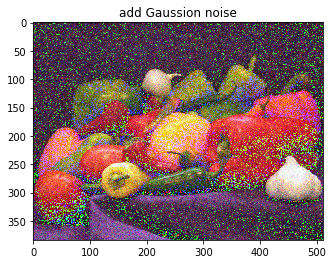

In [2]:
img_g = gasuss_noise(img,0,0.01)
cv2.waitKey (0)  
cv2.destroyAllWindows() 
plt.imshow(img_g[:,:,::-1])     # bgr --> rgb
plt.title('add Gaussion noise')  
cv2.imwrite("peppers_Gaussion.png", img_g)

True

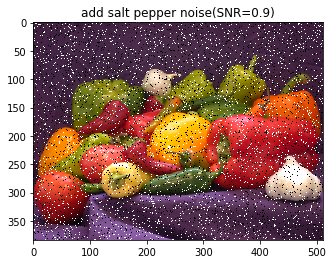

In [3]:
img_s = addsalt_pepper(img.transpose(2, 1, 0), 0.9)     
img_s = img_s.transpose(2, 1, 0)
cv2.waitKey(0)
cv2.destroyAllWindows() 
plt.imshow(img_s[:,:,::-1])     # bgr --> rgb
plt.title('add salt pepper noise(SNR=0.9)')  
cv2.imwrite("peppers_sp.png", img_s)

D:\anaconda\lib\site-packages\skimage\io\_io.py:49: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')
D:\anaconda\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


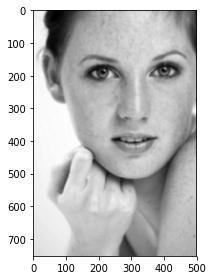

In [2]:
from tkinter import *
from skimage import io
import numpy as np


im=io.imread('original_face.jpeg', as_grey=True)
im_copy_med = io.imread('original_face.jpeg', as_grey=True)
im_copy_mea = io.imread('original_face.jpeg', as_grey=True)
for i in range(0,im.shape[0]):
    for j in range(0,im.shape[1]):
        im_copy_med[i][j]=im[i][j]
        im_copy_mea[i][j]=im[i][j]
#ui
root = Tk()
root.title("peppers")
root.geometry('300x200')

medL = Label(root, text="中值滤波：")
medL.pack()
med_text = StringVar()
med = Entry(root, textvariable = med_text)
med_text.set("")
med.pack()

meaL = Label(root, text="均值滤波：")
meaL.pack()
mea_text = StringVar()
mea = Entry(root, textvariable = mea_text)
mea_text.set("")
mea.pack()

def m_filter(x, y, step):
    sum_s=[]
    for k in range(-int(step/2),int(step/2)+1):
        for m in range(-int(step/2),int(step/2)+1):
            sum_s.append(im[x+k][y+m])
    sum_s.sort()
    return sum_s[(int(step*step/2)+1)]

def mean_filter(x, y, step):
    sum_s = 0
    for k in range(-int(step/2),int(step/2)+1):
        for m in range(-int(step/2),int(step/2)+1):
            sum_s += im[x+k][y+m] / (step*step)
    return sum_s

def on_click():
    if(med_text):
        medStep = int(med_text.get())
        for i in range(int(medStep/2),im.shape[0]-int(medStep/2)):
            for j in range(int(medStep/2),im.shape[1]-int(medStep/2)):
                im_copy_med[i][j] = m_filter(i, j, medStep)
    if(mea_text):
        meaStep = int(mea_text.get())
        for i in range(int(meaStep/2),im.shape[0]-int(meaStep/2)):
            for j in range(int(meaStep/2),im.shape[1]-int(meaStep/2)):
                im_copy_mea[i][j] = mean_filter(i, j, meaStep)
    io.imshow(im_copy_med)
    io.imsave(str(medStep) + 'med.jpg', im_copy_med)
    io.imshow(im_copy_mea)
    io.imsave(str(meaStep) + 'mea.jpg', im_copy_mea)

Button(root, text="filterGo", command = on_click).pack()

root.mainloop()

In [7]:
import cv2 as cv
import numpy as np
import math
import copy

def spilt( a ):
    if a/2 == 0:
        x1 = x2 = a/2
    else:
        x1 = math.floor( a/2 )
        x2 = a - x1
    return -x1,x2

def d_value():
    value = np.zeros(256)
    var_temp = 30
    for i in range(0,255):
        t = i*i
        value[i] = math.e ** (-t / (2 * var_temp * var_temp))
    return value

def gaussian_b0x(a, b):
    judge = 10
    box =[]
    x1, x2 = spilt(a)
    y1, y2 = spilt(b)
    for i in range (x1, x2 ):
        for j in range(y1, y2):
            t = i*i + j*j
            re = math.e ** (-t/(2*judge*judge))
            box.append(re)
    # for x in box :
    #     print (x)
    return box

def original (i, j, k, a, b, img):
    x1, x2 = spilt(a)
    y1, y2 = spilt(b)
    temp = np.zeros(a * b)
    count = 0
    for m in range(x1, x2):
        for n in range(y1, y2):
            if i + m < 0 or i + m > img.shape[0] - 1 or j + n < 0 or j + n > img.shape[1] - 1:
                temp[count] = img[i, j, k]
            else:
                temp[count] = img[i + m, j + n, k]
            count += 1
    return   temp

def bilateral_function(a, b, img, gauss_fun,d_value_e ):
    x1, x2 = spilt(a)
    y1, y2 = spilt(b)
    re = np.zeros(a * b)
    img0 = copy.copy(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(0,2):
                temp = original(i, j, k, a, b, img0)
                # print("ave:",ave_temp)
                count = 0
                for m in  range (x1,x2):
                    for n in range(y1,y2):
                        if i+m < 0 or i+m >img.shape[0]-1 or j+n <0 or j+n >img.shape[1]-1:
                            x = img[i,j,k]
                        else :
                            x = img[i+m,j+n,k]
                        t = int(math.fabs(int(x) - int(img[i,j,k])) )
                        re[count] =  d_value_e[t]
                        count += 1
                evalue = np.multiply(re, gauss_fun)
                img[i,j,k] = int(np.average(temp, weights = evalue))
    return  img

def main():
    gauss_new = gaussian_b0x(30, 30 )
    # print(gauss_new)
    d_value_e = d_value()
    img0 = cv.imread(r"original_face.jpeg")
    bilateral_img = bilateral_function(30, 30, copy.copy(img0), gauss_new, d_value_e)
    cv.imshow("shuangbian", bilateral_img)
    cv.imshow("yuantu", img0)
    cv.imwrite("shuangbian.jpg", bilateral_img)
    cv.waitKey(0)
    cv.destroyAllWindows()


if __name__  ==  "__main__":
    main()


